phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot,epsilon
0.15 -1.4149270246e-05 2.73037976234e-05 1831.24709206 0.05 0.134274014896
Initial eta= 3.5
ai= 1831.24709206  phi_i= 0.15  epsilon_i= 0.00408754606611
a_end= 1981364.28736  phi_end= -2.80307034147e-14  k_end= 53.0508983897  N= 6.98654371461  epsilon= 1.05264730534e-22
k_ini= 0.05  phi= 0.15  epsilon= 0.00408754606611
k= 53.0508983897  phi= -6.42755115301e-14
The perturbation scale to be calculate is  10
Approximated As= -3961690.79002
SR As= 77997560.4456


/Users/brettlv/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:514: RuntimeWarning: invalid value encountered in double_scalars


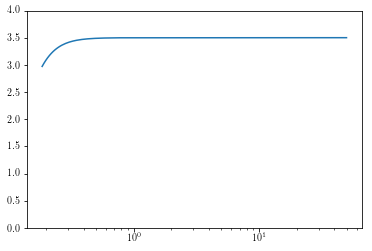

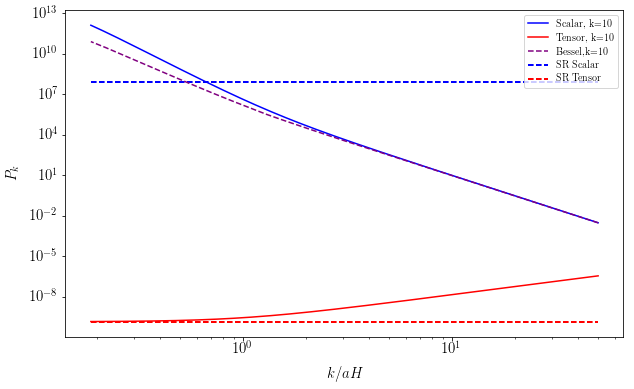

curvature perturbation= 1.26537734008e+12    tensor perturbation= 1.50389297246e-10


In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  5 10:39:25 2019

@author: qinggao
"""

import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import special as sp
#pi=3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912

pi=np.pi
# Now the unit is chosen as 8pi G=1

def dervis(y,k,n):
    z1=potential(y[1])
    Vp=z1[0]
    dV=z1[1]
    ddV=z1[2]
    a2V=y[0]**2*Vp
    a2dV=y[0]**2*dV
    a2ddV=y[0]**2*ddV
    aH=np.sqrt(1./3.*(0.5*y[2]**2+a2V))
    zppz=2*aH**2-a2ddV-0.5*(7.*y[2]**2+4.*y[2]/aH*a2dV)+0.5*y[2]**4/aH/aH
    appa=2.*aH**2-y[2]**2/2.
    if n==3:
        z=np.array([
        y[0]*aH,y[2],-2.*aH*y[2]-a2dV])
    else:
        z=np.array([
        y[0]*aH,y[2],-2.*aH*y[2]-a2dV,y[5],y[6],-(k**2-zppz)*y[3],
        -(k**2-zppz)*y[4],y[9],y[10],-(k**2-appa)*y[7],-(k**2-appa)*y[8]
        ])
    return z

def potential(x):
    global v,et2
    et2=v[1]/v[0]
#    potential V1
#    if x>0:
#        z=np.array([v[0]+x*v[1]+x**2*v[2]+x**3*v[3]+x**4*v[4]+x**5*v[5],
#        v[1]+2*x*v[2]+3*x**2*v[3]+x**3*4*v[4]+x**4*5*v[5],
#        2*v[2]+6*x*v[3]+x**2*12*v[4]+x**3*20*v[5]])
#    else:
#        z=np.array([v[0]+x*v[1]+x**2*v[2]+x**3*v[3],
#        v[1]+2*x*v[2]+3*x**2*v[3],
#        2*v[2]+6*x*v[3]])
#    potential V2
#    z=v[0]*np.array([3.*(np.sinh(x*np.sqrt(et2/2.)))**2.-et2*
#                (np.cosh(x*np.sqrt(et2/2.)))**2.,
#                -(et2-3.)*np.sqrt(et2)*np.sinh(x*np.sqrt(2.*et2))/np.sqrt(2.),
#                -(et2-3.)*et2*np.cosh(x*np.sqrt(2.*et2))])
#    potential V3
    z=v[0]*np.array([3.*(np.cosh(x*np.sqrt(et2/2.)))**2.-et2*
                 (np.sinh(x*np.sqrt(et2/2.)))**2.,
                 -(et2-3.)*np.sqrt(et2)*np.sinh(x*np.sqrt(2.*et2))/np.sqrt(2.),
                 -(et2-3.)*et2*np.cosh(x*np.sqrt(2.*et2))])
    if z[0]<0:
        exit("Negative potential")
#        print('phi=',x)
#        print('v=',z[0])
#        print('pars=',v/v[0])
    '''if z[1]>=0:
        exit("dV/dphi>=0, but we require a negative potential slope.")'''
    return z

def attractor(phi_0,accuracy,precision):#return phidot_0 and H_0
    maxtime=1000
    z1=potential(phi_0)
    V0=z1[0]
    dV0=z1[1]
    ddV0=z1[2]
    phidot_0new=-dV0/3./np.sqrt((1./3.)*V0)
    z1=checkSR(phi_0)
    eps1=z1[0]
    eta1=z1[1]
    if eps1<0.1 and abs(eta1)<0.1:
        phidot_0=phidot_0new
        H_0=np.sqrt((1./3.)*V0)
    phi=phi_0
    counter=0
    phidot_0old=phidot_0new/1.e6
    while abs(phidot_0new/phidot_0old-1.)>=precision:
        counter=counter+1
        if (counter>=maxtime):
            error=True
            print("Connot find an attractor in",maxtime,"times of iterations.")
            return
        phidot_0old=phidot_0new
        phi=phi+dV0/V0/2. #decrease phi to its approximate value 1/2 e-fold backwards
        z1=potential(phi)
        Vp=z1[0]
        dV=z1[1]
        ddV=z1[2]
        a=1
        phidot=-dV/3./np.sqrt((1./3.)*Vp)
        y=np.array([a,phi,a*phidot])
        y=evolve_background(y,phi_0,accuracy)
        phidot_0new=y[2]/y[0]
    phidot_0=phidot_0new
    H_0=np.sqrt((1./3.)*(0.5*phidot_0**2+V0))
    return np.array([phidot_0,H_0])

def evolve_background(y,phi_stop,accuracy):
    k=0
    epsilon=0
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    z1=potential(y[1])
#    Vp=z1[0]
    dV=z1[1]
#    ddV=z1[2]
    if dV>=0.:
        while y[1]>=(phi_stop-y[2]*dtau):
            z1=evolve_eqns(k,y,epsilon,accuracy)
            y=z1[0]
            dtau=z1[1]
    else:
        while y[1]<=(phi_stop-y[2]*dtau):
            z1=evolve_eqns(k,y,epsilon,accuracy)
            y=z1[0]
            dtau=z1[1]
    dy=dervis(y,k,3)
    dtau=(phi_stop-y[1])/dy[1]
    return y+dtau*dy

def evolve_eqns(k,y,epsilon,accuracy):
#    z1=potential(y[1])
#    V=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    y=rk4(y,3,k,dtau)
    return np.array([y,dtau])

def rk4(y,n,k,h):
    hh=0.5*h
    h6=h/6.
    dy1=dervis(y,k,n)
    yt=y+hh*dy1
    dy2=dervis(yt,k,n)
    yt=y+hh*dy2
    dy3=dervis(yt,k,n)
    yt=y+h*dy3
    dy3=dy2+dy3
    dy2=dervis(yt,k,n)
    return y+h6*(dy1+2.*dy3+dy2)

def checkSR(x):
    z1=potential(x)
    Vp=z1[0]
    dV=z1[1]
    ddV=z1[2]
    epsilon=1./2.*(dV/Vp)**2
    eta=ddV/Vp
    if epsilon>=1 or eta**2>=1:
        print("At phi=",x,"we have epsilon=",epsilon,"eta=",eta)
#        print("This is not slow-roll and cannot be treated by this code.")
    return np.array([epsilon,eta,Vp])

def reach_inf(y,accuracy):
    k=0
    ai=y[0]
    phi_i=y[1]
    zsr=checkSR(phi_i)
    print("ai=",ai," phi_i=",phi_i," epsilon_i=",zsr[0])
    dy=dervis(y,k,3)
    z1=potential(y[1])
    Vp=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
#    while (y[2]/y[0])**2<Vp:
    while y[1]>phi_stop:
        dy=dervis(y,k,3)
        aH=dy[0]/y[0]
        eta=-dy[2]/(aH*y[2])+1.
        dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
        y=rk4(y,3,k,dtau)
        z1=potential(y[1])
        Vp=z1[0]

#        dV=z1[1]
#        ddV=z1[2]
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    phi_end=y[1]
    k_end=dy[0]/y[0]
    ae=y[0]
    Nphi=np.log(y[0]/ai)
    epsilon=0.5*y[2]**2/aH**2
    print("a_end=",ae," phi_end=",phi_end," k_end=",k_end, \
          " N=",Nphi," epsilon=",epsilon)
    return np.array([phi_end,k_end,ae,Nphi,epsilon])

def reach_aH(y,aH_stop,accuracy):#Evolve to the given value of aH
    k=0
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    while aH<=aH_stop:
        y=rk4(y,3,k,dtau)
        dy=dervis(y,k,3)
        aH=dy[0]/y[0]
        dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    return y

def compute_spectrum(phi_pivot,k_pivot,k_min,nk,dlnk,precision_back,precision_pivot,precision_ini,precision_pert,ratio_min,ratio_max,kk):
    maxtime=1000
    #this two ks are for test
#    k1=5.e-4
#    k2=1.e2
    '''z1=attractor(phi_pivot,precision_back,precision_pivot)
    phidot_pivot=z1[0]
    H_pivot=z1[1]'''
#    initial conditions set by the exact solution for constant-roll
    H_pivot=np.sqrt(v[0])*np.cosh(phi_pivot*np.sqrt(0.5*et2))
    phidot_pivot=-np.sqrt(2.0*et2*v[0])*np.sinh(phi_pivot*np.sqrt(0.5*et2))
    epshi=(phidot_pivot/H_pivot)**2./2.
    z1=potential(phi_pivot)
    Vp=z1[0]
    dV=z1[1]
    ddV=z1[2]
    if (error or phidot_pivot**2./Vp>0.1):
        print("The kenitic energy is not small at pivotal point. Use the analytical results")
        print(phidot_pivot**2./Vp)
        z1=checkSR(phi_pivot)
        veps1=z1[0]
        veta1=z1[1]
        print("epsilon=",veps1," eta=",veta1)
        H_pivot=np.sqrt(v[0])*np.cosh(phi_pivot*np.sqrt(0.5*et2))
        phidot_pivot=-np.sqrt(2.0*et2*v[0])*np.sinh(phi_pivot*np.sqrt(0.5*et2))
    a_pivot=k_pivot/H_pivot
    print("phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot,epsilon")
    print(phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot,epshi)
    y=np.array([a_pivot,phi_pivot,a_pivot*phidot_pivot])
    dy=dervis(y,kk,3)
    aH=dy[0]/y[0]
    eta=-dy[2]/(aH*y[2])+1.
    print('Initial eta=',eta)
    z1=reach_inf(y,precision_back)
    phi_end=z1[0]
    k_end=z1[1]
    ae=z1[2]
    Nphi=z1[3]
    #####phi>phi_pivot, test integration from phi_pivot
    ### this test can be ignored since it was integratd to the end of inflation alreday
#    k_max=k_min*np.exp((nk-1)*dlnk)
#    y=np.array([a_pivot,phi_pivot,a_pivot*phidot_pivot])#This line can be deleted
#    if k2<=k_max/ratio_max:
#        y=reach_aH(y,k2,precision_back)
#        phi2=y[1]
#    z1=potential(phi2)
#    Vp=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
#    if (y[2]/y[0])**2.-Vp>=0.:
#        print("Inflation ends before k2=",k2,"crossing horizon")
#    else:
#        print("inflation at k2=",k2," phi2=",phi2)
    ######phi<phi_pivot, find out the initial value y_ini earlier than phi_pivot
    aH_ini=k_min/ratio_min
    a_try=a_pivot
    H_try=H_pivot
    phi_try=phi_pivot
    counter=0
    while a_try*H_try>=aH_ini:
        counter=counter+1
        if counter>=maxtime:
            exit("When searching for an initial value of phi just before observable infaltion \
            takes places. The code could not converge after",maxtime,"iterations. The potential \
            might not allow enough inflationary e-folds before reaching pivot scale.")
        z1=potential(phi_try)
        Vp=z1[0]
        dV=z1[1]
#        ddV=z1[2]
        phi_try=phi_try+1.2*np.log(a_try*H_try/aH_ini)*dV/Vp
        z1=attractor(phi_try,precision_back,precision_ini)
        phidot_try=z1[0]
        H_try=z1[1]
        y=np.array([1.,phi_try,phidot_try*1.])
        y=evolve_background(y,phi_pivot,precision_back)
        a_try=a_pivot/y[0]

# get the initial valaue earlier than phi_*
    H_try=np.sqrt(v[0])*np.cosh(phi_try*np.sqrt(0.5*et2))
    phidot_try=-np.sqrt(2.0*et2*v[0])*np.sinh(phi_try*np.sqrt(0.5*et2))
    a_try=a_pivot*(np.sinh(phi_pivot*np.sqrt(0.5*et2))/np.sinh(phi_try*np.sqrt(0.5*et2)))**(1./et2)
    y=np.array([a_try,phi_try,phidot_try*a_try])
    zsr=checkSR(phi_try)
    print("k_ini=",a_try*H_try," phi=",phi_try, " epsilon=", zsr[0])

    #test the integration from this new initial value to k_max/ratio_max or k_end
    #can ignore this test to k1
#    if k1>=k_min/ratio_min:
#        y=reach_aH(y,k1,precision_back)
#        phi1=y[1]
#    z1=potential(phi1)
#    Vp=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
#    if (y[2]/y[0])**2.-Vp>=0.:
#        print("Inflation ends at k1=",k1)
#    else:
#        print("Inflation at k1=",k1,"   phi1=",phi1)
    kt_max=k_max/ratio_max
    if k_max/ratio_max>k_end:
        kt_max=k_end
        y=reach_aH(y,kt_max,precision_back)
    else:
        y=reach_aH(y,kt_max,precision_back)
    print("k=",kt_max," phi=",y[1])
    ###set the background initial condition
    y=np.array([a_try,phi_try,a_try*phidot_try])
#    z1=reach_inf(y,precision_back) #test the end from this initial value
#    phi_end=z1[0]
#    k_end=z1[1]
#    ae=z1[2]
    ###compute spectrum
    z1=spectrum(y,k_min,ratio_min,phi_stop,precision_pert,precision_back,ratio_max,kk)
    print("curvature perturbation=",z1[0],"   tensor perturbation=",z1[1])
#    spectrum_k(y,k_min,ratio_min,phi_stop,precision_back,dlnk,ratio_max)
    return

def spectrum(y_ini,k_min,ratio_min,phie,precision_pert,precision_back,ratio_max,kk):
    z1=potential(y_ini[1])
    Vp=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
    aH=np.sqrt((1./3.)*(0.5*y_ini[2]**2.+y_ini[0]**2*Vp))
    if aH>=k_min/ratio_min:
        exit("At initial time, a*k_min>aH*ratio_min")
    print("The perturbation scale to be calculate is ",kk)
# For each mode kk, the initial value starts at kk/ratio_min (thought as minus infinity)
    y=reach_aH(y_ini,kk/ratio_min,precision_back)
    z1=mode(y,kk,precision_back,ratio_max,phie)
    curvature=z1[0]
    tensor=z1[1]
    evolvingk(y,kk,precision_pert,ratio_max,phie)
    return np.array([curvature,tensor])

'''
 here we calculate the spectrum with three methods. (1) numerical method, the results
 are stored in ktrack, cvtrack,tstrack. (2) Use slow-roll asymptotic Bessel method, H and epsilon_H
 are caculated numerically, and the results are stored in asbessel. (3) slow rolll method.
 use the slow-roll asymptotic Bessel method, H and epsilon are calculated from slow-roll
 formula with the potential V.
'''

def spectrum_k(y_ini,k_min,ratio_min,phie,precision_back,dlnk,ratio_max):
    global nk
    cvtrack=[]
    ktrack=[]
    tstrack=[]
    asbessel=[]
    assr=[]
    atsr=[]
    ak=[]
    phik=[]
    z1=potential(y_ini[1])
    Vp=z1[0]
#    dV=z1[1]
#    ddV=z1[2]
    aH=np.sqrt((1./3.)*(0.5*y_ini[2]**2.+y_ini[0]**2*Vp))
    if aH>=k_min/ratio_min:
        exit("At initial time, a*k_min>aH*ratio_min")
    for i in range(nk):
        kk=k_min*np.exp(i*dlnk)
        ktrack.append(kk)
        yk=reach_aH(y_ini,kk,precision_back)
        ak.append(yk[0])
        phik.append(yk[1])
        dyk=dervis(yk,kk,3)
        aH=dyk[0]/yk[0]
        epsilon=0.5*yk[2]**2/aH**2
        eta=1.-yk[0]*dyk[2]/(dyk[0]*yk[2])
        askb=((1.+1.46*(2.*epsilon-eta)-2.*epsilon)*(dyk[0]/yk[0]**2.)**2.
             /(8.*pi**2.*epsilon))
        asbessel.append(askb)
        epssr,etasr,vk1=checkSR(yk[1])
        asksr=(1.+1.46*(3.*epssr-etasr)-2.*(epssr+etasr)/3.) \
                *vk1/(24.*pi**2.)/epssr
        atksr=2.*(1.-2.*(1.0-0.73)*epssr)*vk1/(3.*pi**2.)
        assr.append(asksr)
        atsr.append(atksr)
        y=reach_aH(y_ini,kk/50,precision_back)
        y_ini=y
        z1=mode(y,kk,precision_back,ratio_max,phie)
#        print(z1[0])
        cvtrack.append(z1[0])
        tstrack.append(z1[1])
#    filedir='D:/gaoqing/fpan/constant-roll inflation/ultraslowroll/'
    #filedir='E:/ygong/Documents/codes/python/data/'
#    filedir='./'
    plt.figure(figsize=(8,4))
#    plt.loglog(ktrack,cvtrack,'b',label='Scalar')
#    plt.loglog(ktrack,asbessel,'--b',label='Bessel')
#    plt.loglog(ktrack,assr,':m',label='SR')
#    plt.loglog(ktrack,tstrack,'--r',label='Tensor')
    plt.semilogx(ktrack,cvtrack,'b',label='Scalar')
    plt.semilogx(ktrack,asbessel,'--b',label='Bessel')
    plt.semilogx(ktrack,assr,':k',label='SR Scalar')
    plt.semilogx(ktrack,atsr,':k',label='SR Tensor')
    plt.semilogx(ktrack,tstrack,'r',label='Tensor')
    plt.xlabel(r'$k$', labelpad=10,fontsize=15)
    plt.ylabel(r'$P_k$', labelpad=10,fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.legend()
#    plt.savefig(filedir+'eta2pk.pdf')
    plt.show()
    ''''file3=filedir+'eta2pk.txt'
    data=np.array([ktrack,ak,phik,cvtrack,asbessel,assr,tstrack,atsr])
    data=data.T'''
#    print(data)
    '''with open(file3,'w') as file_object:
        file_object.write('The coefficients of the polynomial \n')
        if v[0]==0.:
            np.savetxt(file_object,v.T)
        else:
            file_object.write('V0='+str(v[0])+'\n')
            vi=v[1:]/v[0]
            np.savetxt(file_object,vi.T)

        file_object.write('k a phi As As(Asyp) As(SR) At At(SR) \n')
        np.savetxt(file_object,data)
    file_object.close()'''
    return

#this function is evolving single mode k to the end of inflation
def evolvingk(y,k,accuracy,ratio_max,phie):
    global v
    et2=v[1]
    xtrack=[]
    ytrack=[]
    ttrack=[]
    phitrack=[]
    rtrack=[]
    asrtrack=[]
    zppztrack=[]
    etatrack=[]
    nu=np.abs(v[1]-3./2.)
    yk=reach_aH(y,k,precision_back)
    dyk=dervis(yk,k,3)
    aH=dyk[0]/yk[0]
    epsilon=0.5*yk[2]**2./aH**2.
    eta=1.-yk[0]*dyk[2]/(dyk[0]*yk[2])
    askb=(1.+1.46*(2.*epsilon-eta)-2.*epsilon)*(dyk[0]/yk[0]**2.)**2. \
           /(8.*pi**2.*epsilon)
    print('Approximated As=', askb)
    epssr,etasr,vk1=checkSR(yk[1])
    asksr=(1.+1.46*(3.*epssr-etasr)-2.*(epssr+etasr)/3.) \
                *vk1/(24.*pi**2.)/epssr
    atksr=2.*(1.-2.*(1.0-0.73)*epssr)*vk1/(3.*pi**2.)
    print('SR As=', asksr)
    y1=np.array([1./np.sqrt(2.*k),0,0,-k/np.sqrt(2.*k),\
                 1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k)])
    y=np.hstack((y,y1))
    dtau=accuracy*2.*pi/k
    dy=dervis(y,k,11)
    aH=dy[0]/y[0]
    z=y[0]*y[2]/aH
    ratio=k/aH
    ai=y[0]
    phi_i=y[1]
    hi=dy[0]/y[0]/y[0]
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    a2V=y[0]**2*V
    a2dV=y[0]**2*dV
    a2ddV=y[0]**2*ddV
    zppz=2*aH**2-a2ddV-0.5*(7.*y[2]**2+4.*y[2]/aH*a2dV)+0.5*y[2]**4/aH/aH
    zppztrack.append(zppz/aH**2.)
    eta=-dy[2]/(aH*y[2])+1.
    etatrack.append(eta)
#    asksr1=2**(2*nu-3)*(sp.gamma(nu)/sp.gamma(3./2.))**2*(aH**4./(y[2]**2*(2*pi*y[0])**2))*(k/aH)**(3-2*nu)*(1-epsilon)**(2*nu-1)
#    asksr1=aH**2/(8*pi**2*epsilon*y[0]**2)*2**(2*nu-1)*sp.gamma(nu)**2./pi*(k/aH)**(3.-2.*nu)
    askh=k*k/8./pi*ratio/(1.-epsilon)*(np.abs(sp.hankel1(nu,ratio/(1.-epsilon))))**2./z**2
    asrtrack.append(askh)
    aid=(np.sinh(phi_i*np.sqrt(0.5*et2)))**(1./et2)
    hid=np.cosh(phi_i*np.sqrt(0.5*et2))
    ksol=k/ai/hi
    while y[1]>=phie:
        z=y[0]*y[2]/aH
        vk2=y[3]**2.+y[4]**2.
        ah2=y[7]**2.+y[8]**2.
        curvature=k**3./2./pi**2.*vk2/z**2.
        tensor=4.*k**3./pi**2.*ah2/y[0]**2.
#        epsilon=0.5*y[2]**2/aH**2
#        eta=dy[2]/(aH*y[2])-1.
#        H=aH/y[0]
        xtrack.append(ratio)
        rtrack.append(ksol)
        phitrack.append(y[1])
        ytrack.append(curvature)
        ttrack.append(tensor)
        y=rk4(y,11,k,dtau)
        dy=dervis(y,k,11)
        phi=y[1]
        aH=dy[0]/y[0]
        epsilon=0.5*y[2]**2/aH**2
        z1=potential(y[1])
        V=z1[0]
        dV=z1[1]
        ddV=z1[2]
        a2V=y[0]**2*V
        a2dV=y[0]**2*dV
        a2ddV=y[0]**2*ddV
        #asksr1=2**(2*nu-3)*(sp.gamma(nu)/sp.gamma(3./2.))**2*(aH**4./(y[2]**2*(2*pi*y[0])**2))*(k/aH)**(3-2*nu)*(1-epsilon)**(2*nu-1)
        #asksr1=aH**2/(8*pi**2*epsilon*y[0]**2)*2**(2**nu-1)*sp.gamma(nu)**2./pi*(k/aH)**(3.-2.*nu)
        eta=-dy[2]/(aH*y[2])+1.
        etatrack.append(eta)
        askh=k*k/8./pi*ratio/(1-epsilon)*(np.abs(sp.hankel1(nu,ratio/(1.-epsilon))))**2./z**2
        asrtrack.append(askh)
        asol=ai*aid/(np.sinh(phi*np.sqrt(0.5*et2)))**(1./et2)
        #asol=1.0
        hsol=hi*np.cosh(phi*np.sqrt(0.5*et2))/hid
        ratio=k/aH
        ksol=k/asol/hsol
        zppz=2*aH**2-a2ddV-0.5*(7.*y[2]**2+4.*y[2]/aH*a2dV)+0.5*y[2]**4/aH/aH
        zppztrack.append(zppz/((aH)**2)/(nu**2-1./4.))
#        epsilon=0.5*y[2]**2/aH**2
#        print('epsilonh=',epsilon,eta)
        dtau=accuracy*2.*pi/max(np.sqrt(abs(dy[5]/y[3])),k)
    z=y[0]*y[2]/aH
    vk2=y[3]**2+y[4]**2
    ah2=y[7]**2+y[8]**2
    curvature=k**3./2./pi**2.*vk2/z**2.
    tensor=4.*k**3./pi**2.*ah2/y[0]**2
    xtrack.append(ratio)
    rtrack.append(ksol)
    phitrack.append(phi)
    ytrack.append(curvature)
    ttrack.append(tensor)
    plt.semilogx(xtrack,etatrack)
    plt.ylim(0,4)
    plt.show()
    plt.figure(figsize=(10,6))
    plt.rcParams['text.usetex'] = True
    plt.rc('text', usetex=True)
    plt.rc('font', family='calibri')
    plt.loglog(xtrack,ytrack,'b',label=r'Scalar, k='+str(k))
    plt.loglog(xtrack,ttrack,'r',label=r'Tensor, k='+str(k))
    plt.loglog(xtrack,asrtrack,color='purple',linestyle='dashed',label=r'Bessel,k='+str(k))
    plt.hlines(y=asksr, xmin=xtrack[-1], xmax=xtrack[0], linewidth=2, color = 'b',linestyle='--',label=r'SR Scalar')
    plt.hlines(y=atksr, xmin=xtrack[-1], xmax=xtrack[0], linewidth=2, color = 'r',linestyle='--',label=r'SR Tensor')
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    #    plt.xlim(1.0e-4, 1.0e3)
#    plt.ylim(1.0e-13, 3.0e-2)
    plt.xlabel(r'$k/aH$', labelpad=10,fontsize=15)
    plt.ylabel(r'$P_k$', labelpad=10,fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.legend()
    #plt.savefig("\k=%d.pdf"% k)
    #filedir='E:/ygong/Documents/codes/python/data/
    #plt.savefig(filedir+'etapk2.pdf')
    plt.show()
    '''
    plt.figure(figsize=(10,6))
    plt.rcParams['text.usetex'] = True
    plt.rc('text', usetex=True)
    plt.rc('font', family='calibri')
    plt.semilogx(xtrack,phitrack,'b',label='Numerical')
    plt.semilogx(rtrack,phitrack,':r',label='Exact, eta='+str(et2))
    plt.xlabel(r'$k/aH$', labelpad=10,fontsize=15)
    plt.ylabel(r'$\phi$', labelpad=10,fontsize=15)
    plt.legend()
    plt.savefig(filedir+'bkgres2.pdf')
    plt.show()'''
    return

'''
 initial conditions, starting from y_ini to get the initial point k/ratio_min
 set initial conditions at k/ratio_min like k/50 (effectively thought as k=infty)
 the asymptotic vaue 1/sqrt(2k) is also set at this initital point k/ratio_min
 then integrate the system to superhorizon scale 50k or the end of inflation
'''
def mode(y,k,accuracy,ratio_max,phie):
    y1=np.array([1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k),1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k)])
    y=np.hstack((y,y1))
    dtau=accuracy*2.*pi/k
    dy=dervis(y,k,11)
    aH=dy[0]/y[0]
    ratio=k/aH
    while ratio>=ratio_max and y[1]>=phie:
        y=rk4(y,11,k,dtau)
        dy=dervis(y,k,11)
        aH=dy[0]/y[0]
        ratio=k/aH
        dtau=accuracy*2.*pi/max(np.sqrt(abs(dy[5]/y[3])),k)
    z=y[0]*y[2]/aH
    vk2=y[3]**2+y[4]**2
    ah2=y[7]**2+y[8]**2
    curvature=k**3./2./pi**2.*vk2/z**2.
    tensor=4.*k**3./pi**2.*ah2/y[0]**2.
    return np.array([curvature,tensor])

'''
y[0]=scale factor a
y[1]=phi
y[2]=dphi/dtau
y[3]=Re(vk)
y[4]=Im(vk)
y[5]=dRe(vk)/dtau
y[6]=dIm(vk)/dtau
y[7]=Re(ah)
y[8]=Im(ah)
y[9]=dRe(ah)/dtau
y[10]=dIm(ah)/dtau

Change the mode k you want to calculate in the definition of
the function "spectrum".

'''

#polynomial potential

# Chaotic model with n=2
#potential_paras=np.array([0.,0.,1.,0.,0.,0.])
#phi_pivot=(15.6-2.0*np.log(15.6)/3.0/15.6)
#k_max=7.3e23

# Toy PBH model
#potential_paras=np.array([1.,-0.0353553,-0.0115783,-0.00235702,728.239,-11882.9])
#phi_pivot=-0.54
#k_max=7.4e25


#non-polynomial potential

#constant-roll model, v[0]=V_0, v[1]=eta
#constant-roll model, v1, phi_pivot=17.7
#eta=0.015
#phi_pivot=17.7
#phi_stop=9.2
#eta=2.985
phi_pivot=0.15
phi_stop=1.e-30
k_max=100
#potential_paras=np.array([1.,0.015])
potential_paras=np.array([1.,7/2])

v=potential_paras

#calculate V0
ask=np.exp(3.094)*1.e-10
epssr,etasr,v1=checkSR(phi_pivot)
#print(epssr,etasr,v1)
v0=24.*pi*pi*epssr*ask/v1

error=False

v=v0*v
#print("The potential parameters:")
#print(v)
nk=100
precision_back=0.005
precision_pivot=5.e-6
precision_ini=0.001
precision_pert=0.01
k_min=3
k_pivot=0.05
ratio_min=50.
ratio_max=1./50.
kk=10
dlnk=np.log(k_max/k_min)/(nk-1)
compute_spectrum(phi_pivot,k_pivot,k_min,nk,dlnk,precision_back,precision_pivot,precision_ini,precision_pert,ratio_min,ratio_max,kk)

#phi_t=0.164
#z=potential(phi_t)
#print(z[0])


The potential parameters:
[  1.00000000e+00   1.43497272e+00   3.28633535e-01   2.97000000e-07]
phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot
3.286 -4.44598338818e-07 1.10735610131e-05 4515.25935884 0.05
ai= 4515.25935884  phi_i= 3.286
a_end= 5.65668224932e+30  phi_end= 0.127379157983  k_end= 4.80236687619e+25  N= 62.3951724271  epsilon= 1.00445724909
inflation at k2= 100.0  phi2= 2.94825966248
k_ini= 4.042655089e-09  phi= 3.84500356498
Inflation at k1= 0.0005    phi1= 3.46176681797
k= 4.80236687619e+25  phi= 0.129831514994
ratio= 16.1150383042


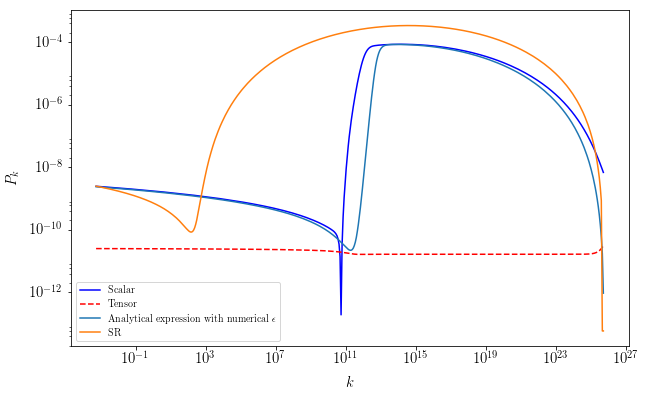

In [3]:
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
pi=np.pi
'''
This code was written by Yizhou Lu and modified by Yungui Gong.
Statement:
This code is based on the fortran program "InflationH" written by Julien Lesgourgues
and Wessel Valkenburg. The fortran program was modified by Yungui Gong and Zhu Yi.
Yizhou Lu translated it into Python.
'''
# Now the unit is chosen as 8pi G=1

def dervis(y,k,n):
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    a2V=y[0]**2*V
    a2dV=y[0]**2*dV
    a2ddV=y[0]**2*ddV
    aH=np.sqrt(1./3.*(0.5*y[2]**2+a2V))
    zppz=2*aH**2-a2ddV-0.5*(7.*y[2]**2+4.*y[2]/aH*a2dV)+0.5*y[2]**4/aH/aH
    appa=2.*aH**2-y[2]**2/2.
    if n==3:
        z=np.array([
        y[0]*aH,y[2],-2.*aH*y[2]-a2dV])
    else:
        z=np.array([
        y[0]*aH,y[2],-2.*aH*y[2]-a2dV,y[5],y[6],-(k**2-zppz)*y[3],
        -(k**2-zppz)*y[4],y[9],y[10],-(k**2-appa)*y[7],-(k**2-appa)*y[8]
        ])
    return z



def potential(x):
    global v
    #if x>0:
    z=np.array([
    v[2]**4*v[3]*x**2/12.*(6*v[2]**2-4*v[0]*v[2]*x+3*x**2)/(v[2]**2+v[1]*x**2)**2,
    v[2]**5*v[3]*x/3.*(3*v[2]**3-3*v[0]*v[2]**2*x-3*(v[1]-1)*v[2]*x**2+v[0]*v[1]*x**3)/(v[2]**2+v[1]*x**2)**3,
    v[2]**5*v[3]/3.*(3*v[2]**5-6*v[0]*v[2]**4*x+3*(3-8*v[1])*v[2]**3*x**2+16*v[0]*v[1]*v[2]**2*x**3+9*(v[1]-1)*v[1]*v[2]*x**4-2*v[0]*v[1]**2*x**5)/(v[2]**2+v[1]*x**2)**4
    ])
    '''
    else:
        z=np.array([v[0]+x*v[1]+x**2*v[2]+x**3*v[3],
        v[1]+2*x*v[2]+3*x**2*v[3],
        2*v[2]+6*x*v[3]])
    if z[0]<0:
        exit("Negative potential")'''
    '''if z[1]>=0:
        exit("dV/dphi>=0, but we require a negative potential slope.")'''
    return z

def attractor(phi_0,accuracy,precision):#return phidot_0 and H_0
    maxtime=1000
    z1=potential(phi_0)
    V0=z1[0]
    dV0=z1[1]
    ddV0=z1[2]
    phidot_0new=-dV0/3./np.sqrt((1./3.)*V0)
    z1=checkSR(phi_0)
    eps1=z1[0]
    eta1=z1[1]
    if eps1<0.1 and abs(eta1)<0.1:
        phidot_0=phidot_0new
        H_0=np.sqrt((1./3.)*V0)
    phi=phi_0
    counter=0
    phidot_0old=phidot_0new/1.e6
    while abs(phidot_0new/phidot_0old-1.)>=precision:
        counter=counter+1
        if (counter>=maxtime):
            exit("Connot find an attractor in",maxtime,"times of iterations.")
        phidot_0old=phidot_0new
        phi=phi+dV0/V0/2. #decrease phi to its approximate value 1/2 e-fold backwards
        z1=potential(phi)
        V=z1[0]
        dV=z1[1]
        ddV=z1[2]
        a=1
        phidot=-dV/3./np.sqrt((1./3.)*V)
        y=np.array([a,phi,a*phidot])
        y=evolve_background(y,phi_0,accuracy)
        phidot_0new=y[2]/y[0]
    phidot_0=phidot_0new
    H_0=np.sqrt((1./3.)*(0.5*phidot_0**2+V0))
    return np.array([phidot_0,H_0])

def evolve_background(y,phi_stop,accuracy):
    k=0
    epsilon=0
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    if dV<=0.:
        while y[1]<=(phi_stop-y[2]*dtau):
            z1=evolve_eqns(k,y,epsilon,accuracy)
            y=z1[0]
            dtau=z1[1]
    else:
        while y[1]>=(phi_stop-y[2]*dtau):
            z1=evolve_eqns(k,y,epsilon,accuracy)
            y=z1[0]
            dtau=z1[1]
    dy=dervis(y,k,3)
    dtau=(phi_stop-y[1])/dy[1]
    return y+dtau*dy

def evolve_eqns(k,y,epsilon,accuracy):
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    y=rk4(y,3,k,dtau)
    return np.array([y,dtau])

def rk4(y,n,k,h):
    hh=0.5*h
    h6=h/6.
    dy1=dervis(y,k,n)
    yt=y+hh*dy1
    dy2=dervis(yt,k,n)
    yt=y+hh*dy2
    dy3=dervis(yt,k,n)
    yt=y+h*dy3
    dy3=dy2+dy3
    dy2=dervis(yt,k,n)
    return y+h6*(dy1+2.*dy3+dy2)


def checkSR(x):
    z1=potential(x)
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    epsilon=1./2.*(dV/V)**2
    eta=ddV/V
    if epsilon>=1 or eta**2>=1:
        print("At phi=",x,"we have epsilon=",epsilon,"eta=",eta)
#        print("This is not slow-roll and cannot be treated by this code.")
    return np.array([epsilon,eta,V])

def reach_inf(y,accuracy):
    k=0
    ai=y[0]
    phi_i=y[1]
    print("ai=",ai," phi_i=",phi_i)
    dy=dervis(y,k,3)
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    while (y[2]/y[0])**2<V:
        dy=dervis(y,k,3)
        aH=dy[0]/y[0]
        dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
        y=rk4(y,3,k,dtau)
        z1=potential(y[1])
        V=z1[0]
        dV=z1[1]
        ddV=z1[2]
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    phi_end=y[2]
    k_end=dy[0]/y[0]
    ae=y[0]
    Nphi=np.log(y[0]/ai)
    epsilon=0.5*y[2]**2/aH**2
    print("a_end=",y[0]," phi_end=",y[1]," k_end=",k_end," N=",Nphi," epsilon=",epsilon)
    return np.array([phi_end,k_end,ae,Nphi,epsilon])

def reach_aH(y,aH_stop,accuracy):#Evolve to the given value of aH
    k=0
    dy=dervis(y,k,3)
    aH=dy[0]/y[0]
    dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    while aH<=aH_stop:
        y=rk4(y,3,k,dtau)
        dy=dervis(y,k,3)
        aH=dy[0]/y[0]
        dtau=accuracy*min(1./aH,abs(y[2]/dy[2]))
    return y



def compute_spectrum(phi_pivot,k_pivot,k_min,nk,dlnk,precision_back,precision_pivot,precision_ini,precision_pert,ratio_min,ratio_max,kk):
    maxtime=1000
    k1=5.e-4
    k2=1.e2
    z1=attractor(phi_pivot,precision_back,precision_pivot)
    phidot_pivot=z1[0]
    H_pivot=z1[1]
    z1=potential(phi_pivot)
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    if (phidot_pivot**2./V>0.1):
        print("The kenitic energy is not small at pivotal point. Use the SR approximation")
        z1=checkSR(phi_pivot)
        veps1=z1[0]
        veta1=z1[1]
        print("epsilon=",veps1," eta=",veta1)
        H_pivot=np.sqrt(1./6.*V*(1.+np.sqrt(1.+2./3.*(dV/V)**2.)))
        phidot_pivot=-dV/3./H_pivot
    a_pivot=k_pivot/H_pivot
    print("phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot")
    print(phi_pivot,phidot_pivot,H_pivot,a_pivot,k_pivot)
    y=np.array([a_pivot,phi_pivot,a_pivot*phidot_pivot])
    z1=reach_inf(y,precision_back)
    phi_end=z1[0]
    k_end=z1[1]
    ae=z1[2]
    Nphi=z1[3]
    #####phi>phi_pivot, test integration from phi_pivot
    k_max=k_min*np.exp((nk-1)*dlnk)
    y=np.array([a_pivot,phi_pivot,a_pivot*phidot_pivot])#This line can be deleted
    if k2<=k_max/ratio_max:
        y=reach_aH(y,k2,precision_back)
        phi2=y[1]
    z1=potential(phi2)
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    if (y[2]/y[0])**2.-V>=0.:
        print("Inflation ends before k2=",k2,"crossing horizon")
    else:
        print("inflation at k2=",k2," phi2=",phi2)
    ######phi<phi_pivot, find out the initial value y_ini earlier than phi_pivot
    aH_ini=k_min/ratio_min
    a_try=a_pivot
    H_try=H_pivot
    phi_try=phi_pivot
    counter=0
    while a_try*H_try>=aH_ini:
        counter=counter+1
        if counter>=maxtime:
            exit("When searching for an initial value of phi just before observable infaltion \
            takes places. The code could not converge after",maxtime,"iterations. The potential \
            might not allow enough inflationary e-folds before reaching pivot scale.")
        z1=potential(phi_try)
        V=z1[0]
        dV=z1[1]
        ddV=z1[2]
        phi_try=phi_try+1.2*np.log(a_try*H_try/aH_ini)*dV/V
        z1=attractor(phi_try,precision_back,precision_ini)
        phidot_try=z1[0]
        H_try=z1[1]
        y=np.array([1.,phi_try,phidot_try*1.])
        y=evolve_background(y,phi_pivot,precision_back)
        a_try=a_pivot/y[0]
    y=np.array([a_try,phi_try,phidot_try*a_try])
    print("k_ini=",a_try*H_try," phi=",phi_try)
    if k1>=k_min/ratio_min:
        y=reach_aH(y,k1,precision_back)
        phi1=y[1]
    z1=potential(phi1)
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    if (y[2]/y[0])**2.-V>=0.:
        print("Inflation ends at k1=",k1)
    else:
        print("Inflation at k1=",k1,"   phi1=",phi1)
    kt_max=k_max/ratio_max
    if k_max/ratio_max>k_end:
        kt_max=k_end
        y=reach_aH(y,kt_max,precision_back)
    print("k=",kt_max," phi=",y[1])
    ###compute spectrum
    y=np.array([a_try,phi_try,a_try*phidot_try])

    '''z1=spectrum(y,k_min,ratio_min,ae,precision_pert,precision_back,ratio_max,kk)
    print("curvature perturbation=",z1[0],"   tensor perturbation=",z1[1])'''

    spectrum_k(y,k_min,ratio_min,ae,precision_back,dlnk,ratio_max)

    return

def spectrum(y_ini,k_min,ratio_min,ae,precision_pert,precision_back,ratio_max,kk):
    z1=potential(y_ini[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    aH=np.sqrt((1./3.)*(0.5*y_ini[2]**2.+y_ini[0]**2*V))
    if aH>=k_min/ratio_min:
        exit("At initial time, a*k_min>aH*ratio_min")
    print("The perturbation scale to be calculate is ",kk)
    y=reach_aH(y_ini,kk/ratio_min,precision_back)
    z1=mode(y,kk,precision_back,ratio_max,ae)
    curvature=z1[0]
    tensor=z1[1]
    evolvingk(y,kk,precision_pert,ratio_max,ae)
    return np.array([curvature,tensor])

def spectrum_k(y_ini,k_min,ratio_min,ae,precision_back,dlnk,ratio_max):
    global nk,v
    cvtrack=[]
    ktrack=[]
    ksrtrack=[]
    tstrack=[]
    asbessel=[]
    assr=[]
    ak=[]
    phik=[]
    psrtrack=[]
    psr1track=[]
    z1=potential(y_ini[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    ysr=np.array([5.656682249314207e+30,0.12737915798285163])
    yk=y_ini
    y=y_ini
    aH=np.sqrt((1./3.)*(0.5*y_ini[2]**2.+y_ini[0]**2*V))
    if aH>=k_min/ratio_min:
        exit("At initial time, a*k_min>aH*ratio_min")
    for i in range(nk):
        kk=k_min*np.exp(i*dlnk)
        ksr=k_min*np.exp((nk-i-1)*dlnk)
        ktrack.append(kk)
        ksrtrack.append(ksr)
        yk=reach_aH(yk,kk,precision_back)
        ysr=reach_aH_sr(ysr,ksr,precision_back)
        phik.append(yk[1])
        dyk=dervis(yk,kk,3)
        aH=dyk[0]/yk[0]
        epsilon=0.5*yk[2]**2/aH**2
        psr=(aH/yk[0])**2./(8.*pi**2)/epsilon
        psr1=4*v[3]*v[2]**6/(96.*24.*pi**2.)*(6-4*v[0]*ysr[1]/v[2]+3*(ysr[1]/v[2])**2)**3*(ysr[1]/v[2])**4/(3-3*v[0]*ysr[1]/v[2]+3*(1-v[1])*(ysr[1]/v[2])**2+v[0]*v[1]*(ysr[1]/v[2])**3)**2
        ak.append(yk[0])
        psrtrack.append(psr)
        psr1track.append(psr1)
        '''
        eta=1.-yk[0]*dyk[2]/(dyk[0]*yk[2])
        ask=((1.+1.46*(2.*epsilon-eta)-2.*epsilon)*(dyk[0]/yk[0]**2.)**2.
             /(8.*pi**2.*epsilon))
        asbessel.append(ask)
        epssr,etasr,vk1=checkSR(yk[1])
        asksr=(1.+1.46*(3.*epssr-etasr)-2.*(epssr+etasr)/3.) \
                *vk1/(24.*pi**2.)/epssr
        assr.append(asksr)
        '''
        y=reach_aH(y,kk/10,precision_back)
        z1=mode(y,kk,precision_back,ratio_max,ae)
#        print(z1[0])
        cvtrack.append(z1[0])
        tstrack.append(z1[1])
#    filedir='./'
    print("ratio=",psrtrack[nk-1]/psr1track[0])
    plt.figure(figsize=(10,6.18))
    plt.loglog(ktrack,cvtrack,'b',label='Scalar')
    #plt.loglog(ktrack,asbessel,'--b',label='Bessel')
    #plt.loglog(ktrack,assr,':m',label='SR')
    plt.loglog(ktrack,tstrack,'--r',label='Tensor')
    plt.loglog(ktrack,psrtrack,label="Analytical expression with numerical $\epsilon$")
    plt.loglog(ksrtrack,psr1track,label="SR")
    plt.xlabel(r'$k$', labelpad=10,fontsize=15)
    plt.ylabel(r'$P_k$', labelpad=10,fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.legend()
    plt.show()
    '''data=np.array([ktrack,ak,phik,cvtrack,asbessel,assr,tstrack])
    data=data.T
#    print(data)
    with open(file3,'w') as file_object:
        file_object.write('The coefficients of the polynomial \n')
        if v[0]==0.:
            np.savetxt(file_object,v.T)
        else:
            file_object.write('V0='+str(v[0])+'\n')
            vi=v[1:]/v[0]
            np.savetxt(file_object,vi.T)

        file_object.write('k a phi As As(Asyp) As(SR) At \n')
        np.savetxt(file_object,data)
    file_object.close()    '''
    return

def evolvingk(y,k,accuracy,ratio_max,ae):
    xtrack=[]
    ytrack=[]
    ttrack=[]
    yk=reach_aH(y,k,precision_back)
    dyk=dervis(yk,k,3)
    aH=dyk[0]/yk[0]
    epsilon=0.5*yk[2]**2/aH**2
    eta=1.-yk[0]*dyk[2]/(dyk[0]*yk[2])
    ask=(1.+1.46*(2.*epsilon-eta)-2.*epsilon)*(dyk[0]/yk[0]**2.)**2. \
           /(8.*pi**2.*epsilon)
    print('Approximated As=', ask)
    epssr,etasr,vk1=checkSR(yk[1])
    asksr=(1.+1.46*(3.*epssr-etasr)-2.*(epssr+etasr)/3.) \
                *vk1/(24.*pi**2.)/epssr
    print('SR As=', asksr)
    y1=np.array([1./np.sqrt(2.*k),0,0,-k/np.sqrt(2.*k),\
                 1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k)])
    y=np.hstack((y,y1))
    dtau=accuracy*2.*pi/k
    dy=dervis(y,k,11)
    aH=dy[0]/y[0]
    ratio=k/aH
    while y[0]<=ae:
        z=y[0]*y[2]/aH
        vk2=y[3]**2+y[4]**2
        ah2=y[7]**2+y[8]**2
        curvature=k**3./2./pi**2.*vk2/z**2.
        tensor=4.*k**3./pi**2.*ah2/y[0]**2.
#        epsilon=0.5*y[2]**2/aH**2
#        eta=dy[2]/(aH*y[2])-1.
#        H=aH/y[0]
        xtrack.append(ratio)
        ytrack.append(curvature)
        ttrack.append(tensor)
        y=rk4(y,11,k,dtau)
        print("phi=",y[1],"a=",y[0])
        dy=dervis(y,k,11)
        aH=dy[0]/y[0]
        ratio=k/aH
        dtau=accuracy*2.*pi/max(np.sqrt(abs(dy[5]/y[3])),k)
    z=y[0]*y[2]/aH
    vk2=y[3]**2+y[4]**2
    ah2=y[7]**2+y[8]**2
    curvature=k**3./2./pi**2.*vk2/z**2.
    tensor=4.*k**3./pi**2.*ah2/y[0]**2
    xtrack.append(ratio)
    ytrack.append(curvature)
    ttrack.append(tensor)
    plt.figure(figsize=(10,6))
    plt.rcParams['text.usetex'] = True
    plt.rc('text', usetex=True)
    plt.rc('font', family='calibri')
    plt.loglog(xtrack,ytrack,'b',label='k='+str(k))
    plt.loglog(xtrack,ttrack,'r',label=r'$\epsilon$='+str(epsilon))
    #    plt.xlim(1.0e-4, 1.0e3)
    #plt.ylim(1.0e-13, 3.0e-2)
    plt.xlabel(r'$k/aH$', labelpad=10,fontsize=15)
    plt.ylabel(r'$P_k$', labelpad=10,fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.legend()
    #plt.savefig("\k=%d.pdf"% k)
    plt.show()
    return

'''
 initial conditions, starting from y_ini to get the initial point k/ratio_min
 set initial conditions at k/ratio_min like k/50 (effectively thought as k=infty)
 the asymptotic vaue 1/sqrt(2k) is also set at this initital point k/ratio_min
 then integrate the system to superhorizon scale 50k or the end of inflation
'''
def mode(y,k,accuracy,ratio_max,ae):
    y1=np.array([1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k),1./np.sqrt(2.*k),0,0,-k*1./np.sqrt(2.*k)])
    y=np.hstack((y,y1))
    dtau=accuracy*2.*pi/k
    dy=dervis(y,k,11)
    aH=dy[0]/y[0]
    ratio=k/aH
    while ratio>=ratio_max and y[0]<=ae:
        y=rk4(y,11,k,dtau)
        dy=dervis(y,k,11)
        aH=dy[0]/y[0]
        ratio=k/aH
        dtau=accuracy*2.*pi/max(np.sqrt(abs(dy[5]/y[3])),k)
    z=y[0]*y[2]/aH
    vk2=y[3]**2+y[4]**2
    ah2=y[7]**2+y[8]**2
    curvature=k**3./2./pi**2.*vk2/z**2.
    tensor=4.*k**3./pi**2.*ah2/y[0]**2.
    return np.array([curvature,tensor,y[1]])

'''
Compute slow-roll background.
'''

def dervis_sr(y,n):
    z1=potential(y[1])
    V=z1[0]
    dV=z1[1]
    ddV=z1[2]
    a2V=y[0]**2*V
    a2dV=y[0]**2*dV
    aH=np.sqrt(1./3.*(a2V))
    if n==2:
        z=np.array([
        y[0]*aH,-a2dV/3./aH])
    else:
        exit("Errors accur in slow-roll computation.")
    return z

def reach_aH_sr(y,aH_stop,accuracy):#Evolve to the given value of aH
    dy=dervis_sr(y,2)
    aH=dy[0]/y[0]
    dtau=-accuracy*min(1./aH,abs(y[1]/dy[1]))
    while aH>=aH_stop:
        y=rk4_sr(y,2,dtau)
        dy=dervis_sr(y,2)
        aH=dy[0]/y[0]
        dtau=-accuracy*min(1./aH,abs(y[1]/dy[1]))
    return y

def rk4_sr(y,n,h):
    hh=0.5*h
    h6=h/6.
    dy1=dervis_sr(y,n)
    yt=y+hh*dy1
    dy2=dervis_sr(yt,n)
    yt=y+hh*dy2
    dy3=dervis_sr(yt,n)
    yt=y+h*dy3
    dy3=dy2+dy3
    dy2=dervis_sr(yt,n)
    return y+h6*(dy1+2.*dy3+dy2)

'''
y[0]=scale factor a
y[1]=phi
y[2]=dphi/dtau
y[3]=Re(vk)
y[4]=Im(vk)
y[5]=dRe(vk)/dtau
y[6]=dIm(vk)/dtau
y[7]=Re(ah)
y[8]=Im(ah)
y[9]=dRe(ah)/dtau
y[10]=dIm(ah)/dtau

Change the mode kk you want to calculate in the main program.
'''
# Chaotic model with n=2
potential_paras=np.array([0.,0.,1.,0.,0.,0.])
phi_pivot=3.286
k_max=4.802366876193308e+25

# Toy PBH model
#potential_paras=np.array([1.,-0.0353553,-0.0115783,-0.00235702,728.239,-11882.9])
#phi_pivot=-0.54
#k_max=5.0e25

#calculate V0
delta=1./3.*(9./2.-1)**(2./3.)
b=2./3.+delta-1.e-4
a=1
vs=np.sqrt(0.108)
l=2.97e-7
v=np.array([a,b,vs,l])
print("The potential parameters:")
print(v)
nk=500
precision_back=0.005
precision_pivot=5.e-4
precision_ini=0.1
precision_pert=0.01
k_min=5.e-4
k_pivot=0.05
ratio_min=10.**3.
ratio_max=1./50.
kk=5e24
dlnk=np.log(k_max/k_min)/(nk-1)
compute_spectrum(phi_pivot,k_pivot,k_min,nk,dlnk,precision_back,precision_pivot,precision_ini,precision_pert,ratio_min,ratio_max,kk)
